`ApJdataFrames` 007: Patten2006
---
`Title`: Spitzer IRAC Photometry of M, L, and T Dwarfs  
`Authors`: Brian M Patten, John R Stauffer, Adam S Burrows, Massimo Marengo, Joseph L Hora, Kevin L Luhman, Sarah M Sonnett, Todd J Henry, Deepak Raghavan, S Thomas Megeath, James Liebert, and Giovanni G Fazio  

Data is from this paper:  


In [1]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

The tables define the value and error as a string:  
`val (err)`   
which is a pain in the ass because now I have to parse the strings, which always takes much longer than it should because data wrangling is hard sometimes.

I define a function that takes a column name and a data frame and strips the output.

In [4]:
def strip_parentheses(col, df):
    '''
    splits single column strings of "value (error)" into two columns of value and error
    
    input:
    -string name of column to split in two
    -dataframe to apply to
    
    returns dataframe
    '''
    
    out1 = df[col].str.replace(")","").str.split(pat="(")
    df_out = out1.apply(pd.Series)
    
    # Split the string on the whitespace 
    base, sufx =  col.split(" ")
    df[base] = df_out[0].copy()
    df[base+"_e"] = df_out[1].copy()
    del df[col]
    
    return df
    

## Table 1 - Basic data on sources

In [5]:
names = ["Name","R.A. (J2000.0)","Decl. (J2000.0)","Spectral Type","SpectralType Ref.","Parallax (error)(arcsec)",
         "Parallax Ref.","J (error)","H (error)","Ks (error)","JHKRef.","PhotSys"]

tbl1 = pd.read_csv("http://iopscience.iop.org/0004-637X/651/1/502/fulltext/64991.tb1.txt", 
                   sep='\t', names=names, na_values='\ldots')

In [6]:
cols_to_fix = [col for col in tbl1.columns.values if "(error)" in col]
for col in cols_to_fix:
    print col
    tbl1 = strip_parentheses(col, tbl1)

Parallax (error)(arcsec)
J (error)
H (error)
Ks (error)


In [7]:
tbl1.head()

,Name,R.A. (J2000.0),Decl. (J2000.0),Spectral Type,SpectralType Ref.,Parallax Ref.,JHKRef.,PhotSys,Parallax,Parallax_e,J,J_e,H,H_e,Ks,Ks_e
0,GJ 1001A,00 04 36.4,-40 44 03,M3.5,1,NaN,1,2MA,NaN,NaN,8.60,0.01,8.04,0.03,7.74,0.04
1,GJ 1093,06 59 28.9,+19 20 53,M5.0,2,1,1,2MA,0.12880,0.00350,9.16,0.02,8.55,0.02,8.23,0.02
2,GJ 1156,12 18 59.5,+11 07 33,M5.0,2,1,1,2MA,0.15290,0.00300,8.53,0.03,7.88,0.03,7.57,0.03
3,GJ 1002,00 06 43.4,-07 32 19,M5.5,2,1,1,2MA,0.21300,0.00360,8.32,0.02,7.79,0.03,7.44,0.02
4,LHS 288,10 44 21.3,-61 12 35,M5.5,3,1,1,2MA,0.22250,0.01130,8.49,0.01,8.05,0.04,7.73,0.02


## Table 3- IRAC photometry

In [8]:
names = ["Name","Spectral Type","[3.6] (error)","n1","[4.5] (error)","n2",
         "[5.8] (error)","n3","[8.0] (error)","n4","[3.6]-[4.5]","[4.5]-[5.8]","[5.8]-[8.0]","Notes"]

tbl3 = pd.read_csv("http://iopscience.iop.org/0004-637X/651/1/502/fulltext/64991.tb3.txt", 
                   sep='\t', names=names, na_values='\ldots')

In [9]:
cols_to_fix = [col for col in tbl3.columns.values if "(error)" in col]
cols_to_fix
for col in cols_to_fix:
    print col
    tbl3 = strip_parentheses(col, tbl3)

[3.6] (error)
[4.5] (error)
[5.8] (error)
[8.0] (error)


In [10]:
tbl3.head()

,Name,Spectral Type,n1,n2,n3,n4,[3.6]-[4.5],[4.5]-[5.8],[5.8]-[8.0],Notes,[3.6],[3.6]_e,[4.5],[4.5]_e,[5.8],[5.8]_e,[8.0],[8.0]_e
0,GJ 1001A,M3.5,5,5,5,5,0.05,0.04,0.01,1,7.45,0.03,7.40,0.03,7.37,0.01,7.36,0.01
1,GJ 1093,M5.0,4,5,5,5,0.02,0.09,0.02,1,7.86,0.03,7.84,0.02,7.76,0.01,7.74,0.01
2,GJ 1156,M5.0,5,5,5,5,0.08,0.06,0.02,1,7.24,0.03,7.16,0.02,7.10,0.01,7.08,0.01
3,GJ 1002,M5.5,5,5,5,5,0.05,0.04,0.02,2,7.07,0.01,7.01,0.01,6.97,0.02,6.95,0.01
4,LHS 288,M5.5,5,5,5,5,0.06,-0.03,0.07,2,7.31,0.03,7.25,0.04,7.27,0.01,7.20,0.01


In [11]:
pd.options.display.max_columns = 50

In [12]:
del tbl3["Spectral Type"] #This is repeated

In [13]:
patten2006 = pd.merge(tbl1, tbl3, how="outer", on="Name")
patten2006.head()

,Name,R.A. (J2000.0),Decl. (J2000.0),Spectral Type,SpectralType Ref.,Parallax Ref.,JHKRef.,PhotSys,Parallax,Parallax_e,J,J_e,H,H_e,Ks,Ks_e,n1,n2,n3,n4,[3.6]-[4.5],[4.5]-[5.8],[5.8]-[8.0],Notes,[3.6],[3.6]_e,[4.5],[4.5]_e,[5.8],[5.8]_e,[8.0],[8.0]_e
0,GJ 1001A,00 04 36.4,-40 44 03,M3.5,1,NaN,1,2MA,NaN,NaN,8.60,0.01,8.04,0.03,7.74,0.04,5,5,5,5,0.05,0.04,0.01,1,7.45,0.03,7.40,0.03,7.37,0.01,7.36,0.01
1,GJ 1093,06 59 28.9,+19 20 53,M5.0,2,1,1,2MA,0.12880,0.00350,9.16,0.02,8.55,0.02,8.23,0.02,4,5,5,5,0.02,0.09,0.02,1,7.86,0.03,7.84,0.02,7.76,0.01,7.74,0.01
2,GJ 1156,12 18 59.5,+11 07 33,M5.0,2,1,1,2MA,0.15290,0.00300,8.53,0.03,7.88,0.03,7.57,0.03,5,5,5,5,0.08,0.06,0.02,1,7.24,0.03,7.16,0.02,7.10,0.01,7.08,0.01
3,GJ 1002,00 06 43.4,-07 32 19,M5.5,2,1,1,2MA,0.21300,0.00360,8.32,0.02,7.79,0.03,7.44,0.02,5,5,5,5,0.05,0.04,0.02,2,7.07,0.01,7.01,0.01,6.97,0.02,6.95,0.01
4,LHS 288,10 44 21.3,-61 12 35,M5.5,3,1,1,2MA,0.22250,0.01130,8.49,0.01,8.05,0.04,7.73,0.02,5,5,5,5,0.06,-0.03,0.07,2,7.31,0.03,7.25,0.04,7.27,0.01,7.20,0.01


Convert spectral type to number

In [14]:
import gully_custom

In [15]:
patten2006["SpT_num"], _1, _2, _3= gully_custom.specTypePlus(patten2006["Spectral Type"])

Make a plot of mid-IR colors as a function of spectral type.

In [16]:
sns.set_context("notebook", font_scale=1.5)

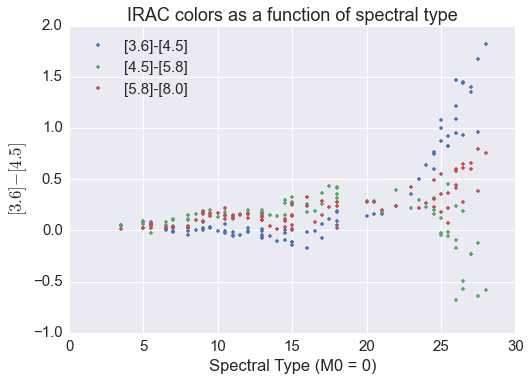

In [17]:
for color in ["[3.6]-[4.5]", "[4.5]-[5.8]", "[5.8]-[8.0]"]:
    plt.plot(patten2006["SpT_num"], patten2006[color], '.', label=color)
    
plt.xlabel(r'Spectral Type (M0 = 0)')
plt.ylabel(r'$[3.6]-[4.5]$')
plt.title("IRAC colors as a function of spectral type")
plt.legend(loc='best')

## Save the cleaned data.

In [22]:
patten2006.to_csv('../data/Patten2006/patten2006.csv', index=False)